# 1 Ajustement d’images par correction gamma

In [1]:
from PIL  import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
imgGot = np.array(Image.open('images/got.jpg'), dtype=np.float)

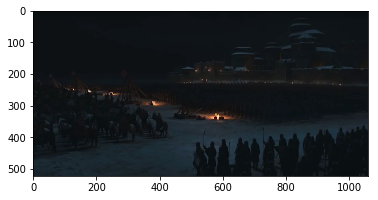

In [3]:

def display(img):
    tod = np.array(img,dtype='uint16')
    plt.imshow(tod)
    
display(imgGot)

In [4]:
imgLowGamma = np.power(imgGot[...,], [0.1, .5, .9])
imgHighGamma = np.power(imgGot[...,], [2.0, 3.0, 4.0])

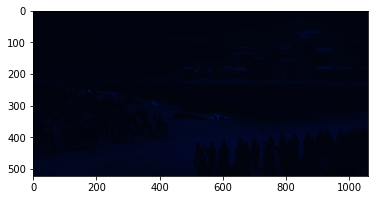

In [5]:
display(imgLowGamma)

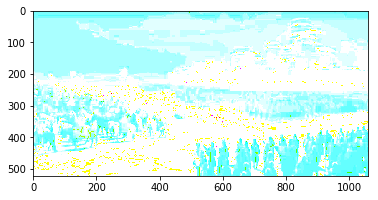

In [6]:
display(imgHighGamma)

# 2 Filtrage d’images

In [7]:
def Gaussian(i,j, size, sigma):
    i = float(i)
    j = float(j)
    size = float(size)
    sigma = float(sigma)
    x = abs((i - size / 2) / size) * 2
    y = abs((j - size / 2) / size) * 2
    m1 = 1.0 / (2 * math.pi * pow(sigma , 2))
    m2 = (pow(x, 2) + pow(y, 2)) * (-1 / (2 * math.pi * pow(sigma, 2)))

    return m1 * math.exp(m2)
    
    
def gaussian_kernel(sigma, size):
    res = [] 
    for i in range(size):
        tab = []
        for j in range(size):
            tab.append(Gaussian(i +1,j +1,size+1, sigma))
        res.append(tab)
    return np.array(res)
                                  
    

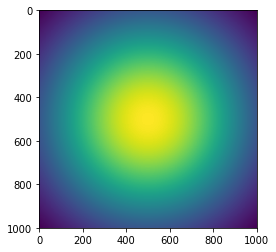

In [8]:
plt.imshow(gaussian_kernel(0.4,1000))

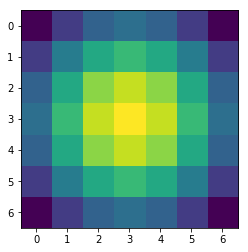

In [9]:
plt.imshow(gaussian_kernel(0.4,7))

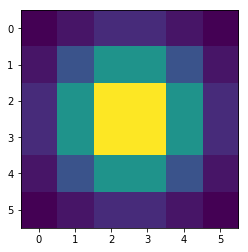

In [10]:
plt.imshow(gaussian_kernel(0.2,6))

In [11]:
def mean_kernel(size):
    return np.full((size,size), 1)

In [12]:
def apply_median_kernel(array2d, kernelsize):
    resarray = np.full(array2d.shape, -1)
    height = len(array2d)
    width = len(array2d[0])
    kern_div_2 = kernelsize / 2.0
    for i in range(height):
        for j in range(width):
            mini = int(max(i - kern_div_2, 0))
            maxi = int(min(i + kern_div_2, height))
            minj = int(max(j - kern_div_2, 0))
            maxj = int(min(j + kern_div_2, width))
            subarr = np.array(array2d[mini:maxi, minj:maxj]).flatten()
            subarr = np.sort(subarr)
            mid = int(len(subarr) / 2.0)
            median = subarr[mid]
            resarray[i,j] = median
    return resarray
                    
                    

    

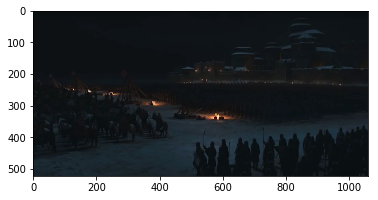

In [13]:
display(imgGot)

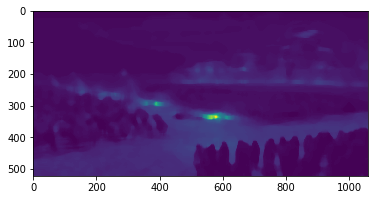

In [14]:
medianKernel = apply_median_kernel(imgGot[...,0],20)
plt.imshow(medianKernel)

In [15]:
imgBoat = np.array(Image.open('images/boat512.gif'))

In [16]:
def apply_gauss_kernel(img, size):
    shaape = img.shape
    return np.convolve(img.flatten(),gaussian_kernel(0.2,size).flatten(), mode='same').reshape(shaape)
    


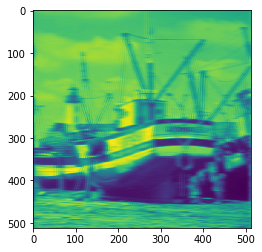

In [17]:
plt.imshow(apply_gauss_kernel(imgBoat, 5))

In [18]:
import cv2


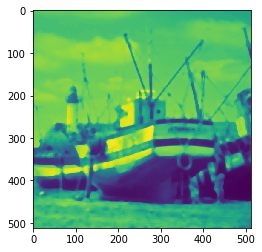

In [19]:
plt.imshow(cv2.medianBlur(imgBoat,9))

In [20]:
import numpy as np

def noise_maker(img):
    
    mu = 0
    sigma = 20
    noise =  np.random.normal(mu, sigma, img.shape)
    noise += img
    return noise


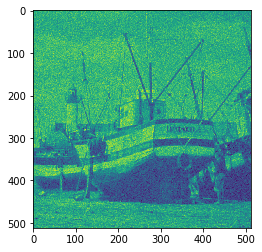

In [21]:
plt.imshow(noise_maker(imgBoat))

In [22]:
sample_idx = np.random.choice(imgBoat.flatten(), 5000, replace=False)

In [23]:
def make_pepper_noise(img):
    height,width = img.shape
    imgLen = height * width
    sample_pixels = np.random.choice(np.arange(imgLen), 30000, replace=False)
    
    def f(x):
        i = x // width
        j = x % width
        img[i,j] = 0 if i % 2 == 0 else 255
        
    map(f, sample_pixels)

In [24]:
tmp = np.array(imgBoat)
make_pepper_noise(tmp)

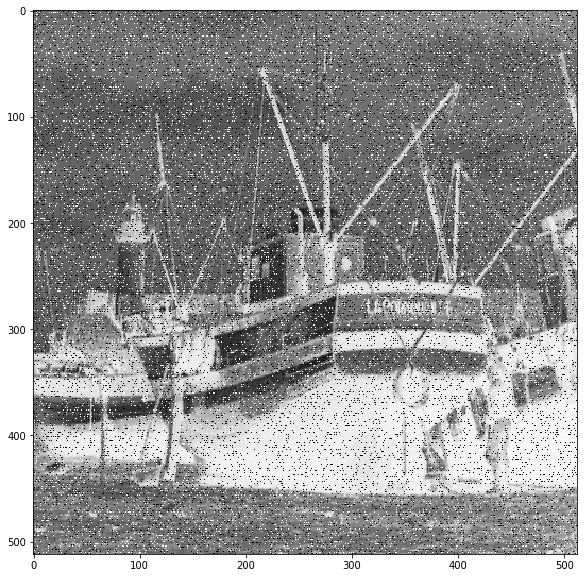

In [25]:
plt.figure(figsize=(30,10))

plt.imshow(tmp, cmap='Greys')

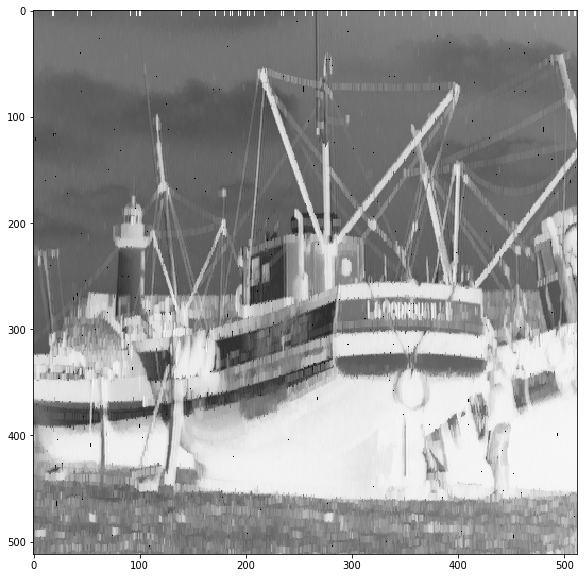

In [26]:
plt.figure(figsize=(30,10))
res1 = cv2.dilate(tmp, (4,4))
res1 = cv2.erode(res1, (2,2))
res1 = cv2.erode(res1, (2,2))
res1 = cv2.erode(res1, (2,2))
res1 = cv2.erode(res1, (2,2))

plt.imshow(cv2.erode(res1, (2,2)), cmap='Greys')

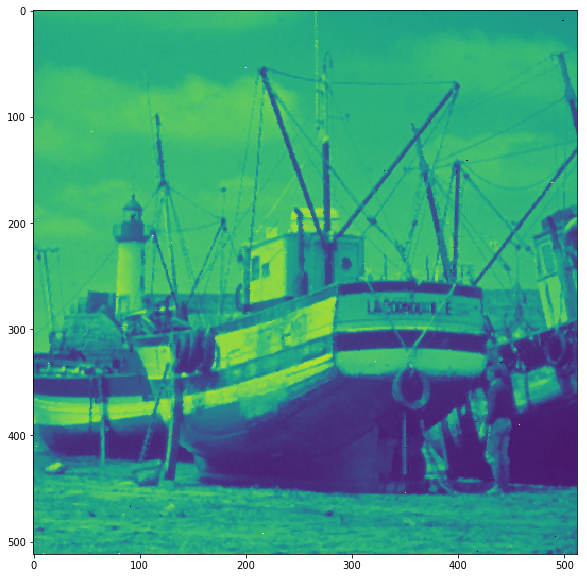

In [27]:
tmp = np.array(imgBoat)
make_pepper_noise(tmp)
plt.figure(figsize=(30,10))
plt.imshow(cv2.medianBlur(tmp,3))

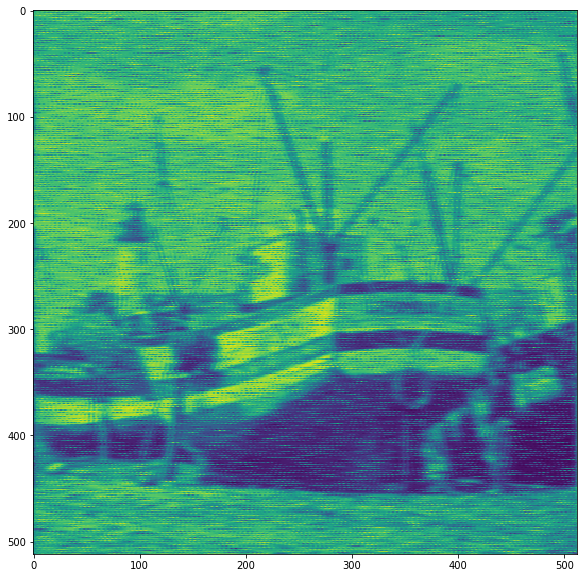

In [28]:
tmp = np.array(imgBoat)
make_pepper_noise(tmp)
plt.figure(figsize=(30,10))
plt.imshow(apply_gauss_kernel(tmp, 4))

In [29]:
# fail